# Dot syntax and plotting in Julia (with PyPlot package)

Julia uses "dot syntax" for elementwise operations on vectors and matrices. It's very similar to Matlab, but more consistent and pervasive. 

## Dot syntax examples

```
x = linspace(-1, 1, 100);  # construct a range of 100 gridpoints uniformly spaced between -1 and 1

y = x.^2 - 2x + 3;         # compute a x^2 - 2x + 3 at all the gridpoints in x, store as a vector

y = sin.(x);               # compute sin x at all gridpoints in x

A = randn(4,4)             # construct a normal-random 4 x 4 matrix

B = A^2                    # compute B = A^2 = A A (matrix multiplication)

C = A.^2                   # compute the squares of the elements of A: C_ij = (A_ij)^2 (elementwise multiplication)
```

Note the following

  * the dot in `sin.(x)`. In Matlab `sin(x)` on vector `x` works fine. 
  * the lack of a `*` in `x.^2 - 2x + 3`! 

Julia has a number of small differences from Matlab like this. Julia is generally stricter about types, consistency, and mathematically correct notation. Julia's efficiency, generality, and extensibility require more careful syntax. 

## Plotting with PyPlot

With a little dot syntax in hand, we're ready for some basic 2d plots. Julia has a number of plotting packages. This notebook demonstrates the PyPlot package, a Julia interface to Python's [matplotlib](https://matplotlib.org/) package. `PyPlot` is very similar to Matlab's plotting, so it's easy to pick up. But it's falling out of favor since the more powerful `Plots` package became available. 

### Installing and loading PyPlot

First we need to install the package and tell Julia to use it. If you get errors from these commands, try running them from the Julia REPL (at the `julia> ` prompt) prior to starting the Julia notebook. 

In [1]:
Pkg.add("PyPlot")  # downlad and install the package --you need to do this only once

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
Pkg.update()      # update packages if previous command suggests it

INFO: Updating METADATA...
INFO: Updating cache of DiffEqBase...
INFO: Updating cache of Plots...
INFO: Updating cache of DataStructures...
INFO: Computing changes...
INFO: Upgrading DataStructures: v0.6.1 => v0.7.1
INFO: Upgrading DiffEqBase: v1.22.0 => v1.23.0
INFO: Upgrading Plots: v0.12.3 => v0.12.4
INFO: Building Plots


In [3]:
using PyPlot       # tell Julia to load the Plots package in the current Julia session

### A simple linear-linear plot

PyPlot is very similar to Matlab's plotting syntax. The linemarker syntax is the same (note the `"b--"` for blue dashed line, etc.). But note the use of duoble quotes for strings instead of Matlab's single quotes.

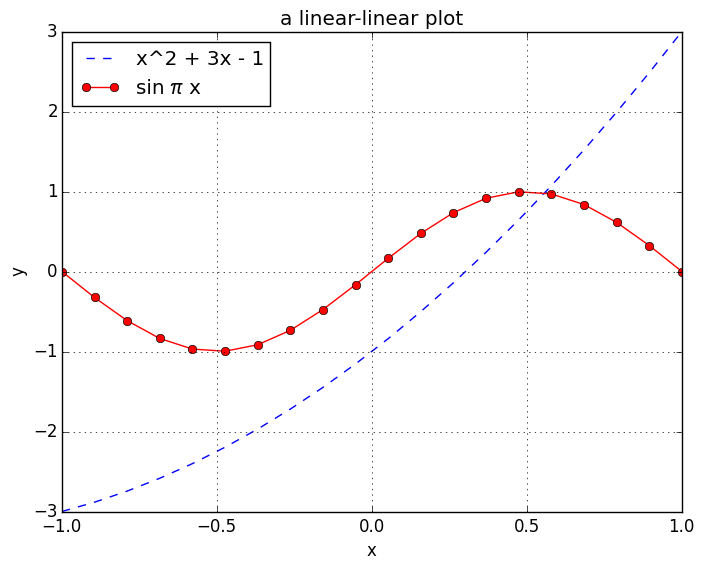

PyObject <matplotlib.text.Text object at 0x7f56fd75d4d0>

In [4]:
x = linspace(-1,1,20)
y₁ = x.^2 + 3x - 1        # get the subscript by typing \_1<TAB>
y₂ = sin.(π*x)            # get π by typing \pi<TAB>

plot(x, y₁, "b--", label="x^2 + 3x - 1")
plot(x, y₂, "r-o", label="sin π x")
xlabel("x")
ylabel("y")
grid("on")
legend(loc="upper left")
title("a linear-linear plot")

### A log-linear plot

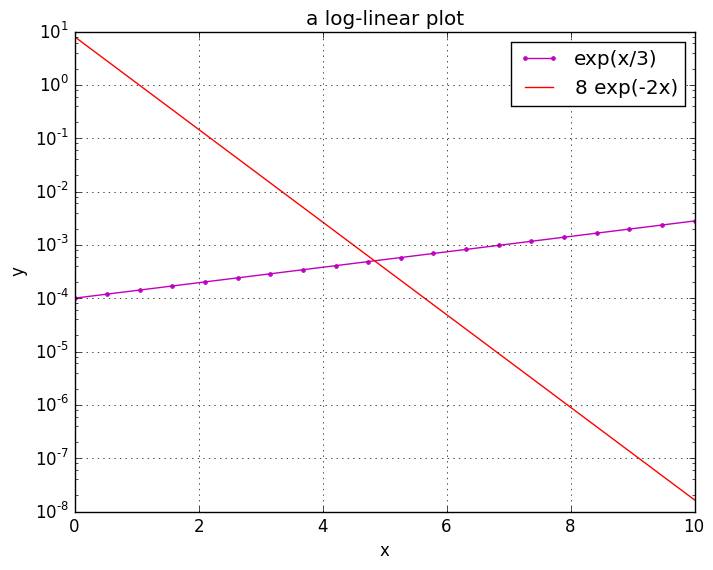

PyObject <matplotlib.text.Text object at 0x7f56fd645dd0>

In [5]:
x = linspace(0,10,20)
y₁ = 1e-04*exp.(x/3)
y₂ = 8*exp.(-2x)

semilogy(x, y₁, "m.-", label="exp(x/3)")
semilogy(x, y₂, "r-", label="8 exp(-2x)")
xlabel("x")
ylabel("y")
grid("on")
legend(loc="upper right")
title("a log-linear plot")

### A log-log plot

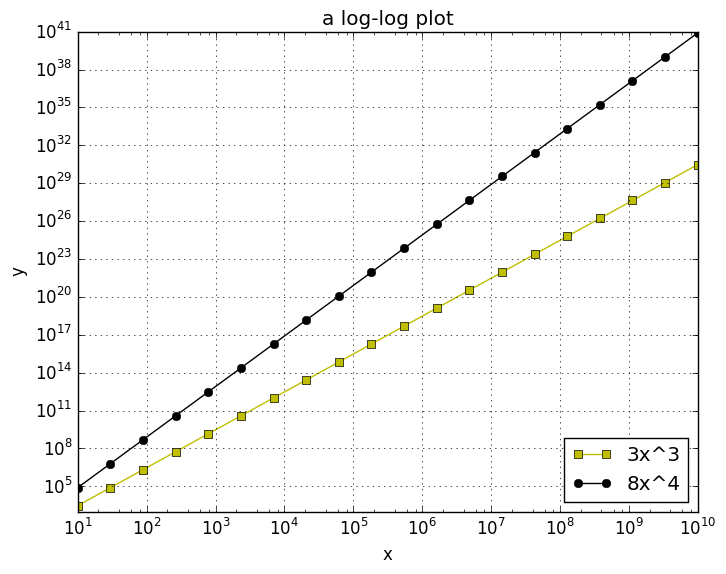

PyObject <matplotlib.text.Text object at 0x7f56fd4161d0>

In [6]:
x = logspace(1,10,20)
y₁ = 3x.^3
y₂ = 8x.^4

loglog(x, y₁, "y-s", label="3x^3")
loglog(x, y₂, "k-o", label="8x^4")
xlabel("x")
ylabel("y")
grid("on")
legend(loc="lower right")
title("a log-log plot")

### Contour plots

`contourf` makes a filled contour plot, `contour` makes just lines. 

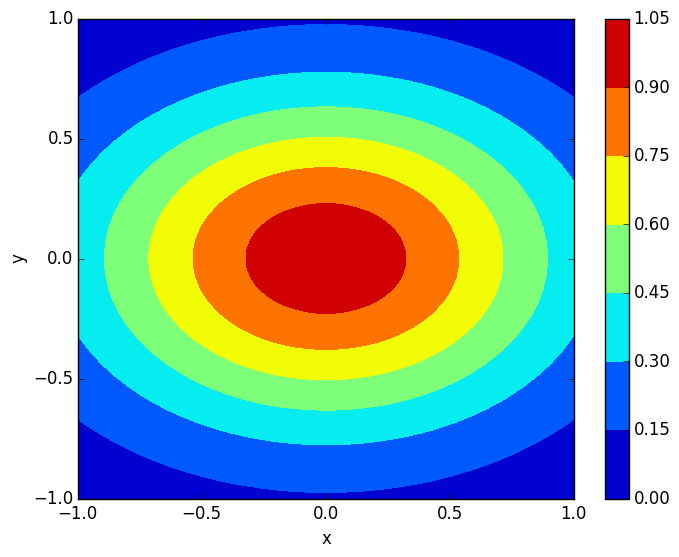

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f56f8f135f0>

In [22]:
xgrid = linspace(-1,1,40)
ygrid = linspace(-1,1,40)
Z = [exp(-(2x^2 + y^2)) for x in xgrid, y in ygrid]

contourf(xgrid, ygrid, Z)
xlabel("x")
ylabel("y")
colorbar()

## Colorplot

Hmmm, I couldn't get a good colorplot with the PyPlots package. This is the best I could do.

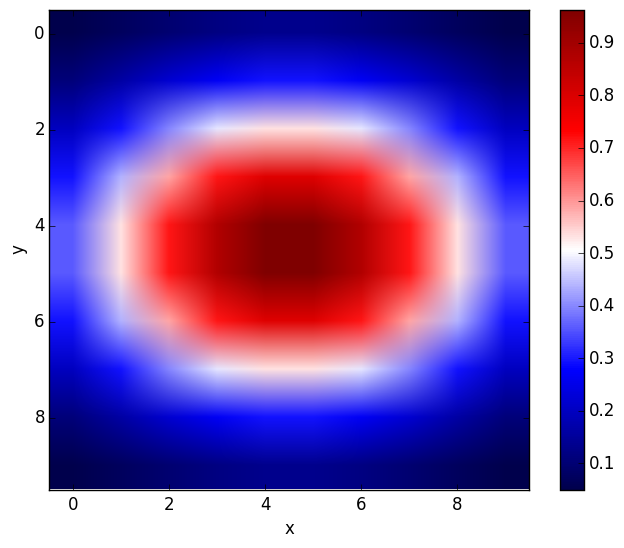

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f56f89405a8>

In [33]:
xgrid = linspace(-1,1,10)
ygrid = linspace(-1,1,10)
Z = [exp(-(2x^2 + y^2)) for x in xgrid, y in ygrid]

imshow(Z, cmap="seismic")
xlabel("x")
ylabel("y")
colorbar()

## Problems

**Problem 1:** Make a linear plot of $\sin 2\pi x$ and $\cos 2\pi x$ over $x \in [-1,1]$, with the $\sin$ in red solid and the $\cos$ in blue dashed lines. Label the axes, give the plot a title, and put a legend in the plot, making sure it doesn't overlap the plotted lines. 

**Problem 2:** Make a log-log plot of $n x^n$ for integer $n$ between -2 and 2 over an appropriate range of $x$. Label the axes and give the plot a title. See if you can figure out a clever way to do this that doesn't require writing out the plotting function five times. 

**Problem 3:** Make a log-linear plot of $n e^{\alpha x}$ for $\alpha = 1$ to $2$ in steps of $0.2$.   Label the axes and give the plot a title. Again, try to be clever.

**Hint for problems 2, 3:** 

In [37]:
for n in -2:2
    s = "the value of n is $n"
    println(s)
end

the value of n is -2
the value of n is -1
the value of n is 0
the value of n is 1
the value of n is 2


**Problem 4:**  Think up an interesting 2d function `z=f(x,y)` and make a contour plot of it.

**Problem 5:** Make a colorplot of a random 10 x 10 matrix. 